In [ ]:
%pip install numpy pandas matplotlib scikit-learn

# Import

In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

file_path = 'vgsales.csv'
df = pd.read_csv(file_path, encoding='MacRoman')
# Remover linhas com valores ausentes nas colunas importantes
df.dropna(subset=["Platform", "Name", "Global_Sales", "Year"], inplace=True)
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# Pergunta 1: Qual foi o jogo mais vendido de todos os tempos(por cada plataforma)?

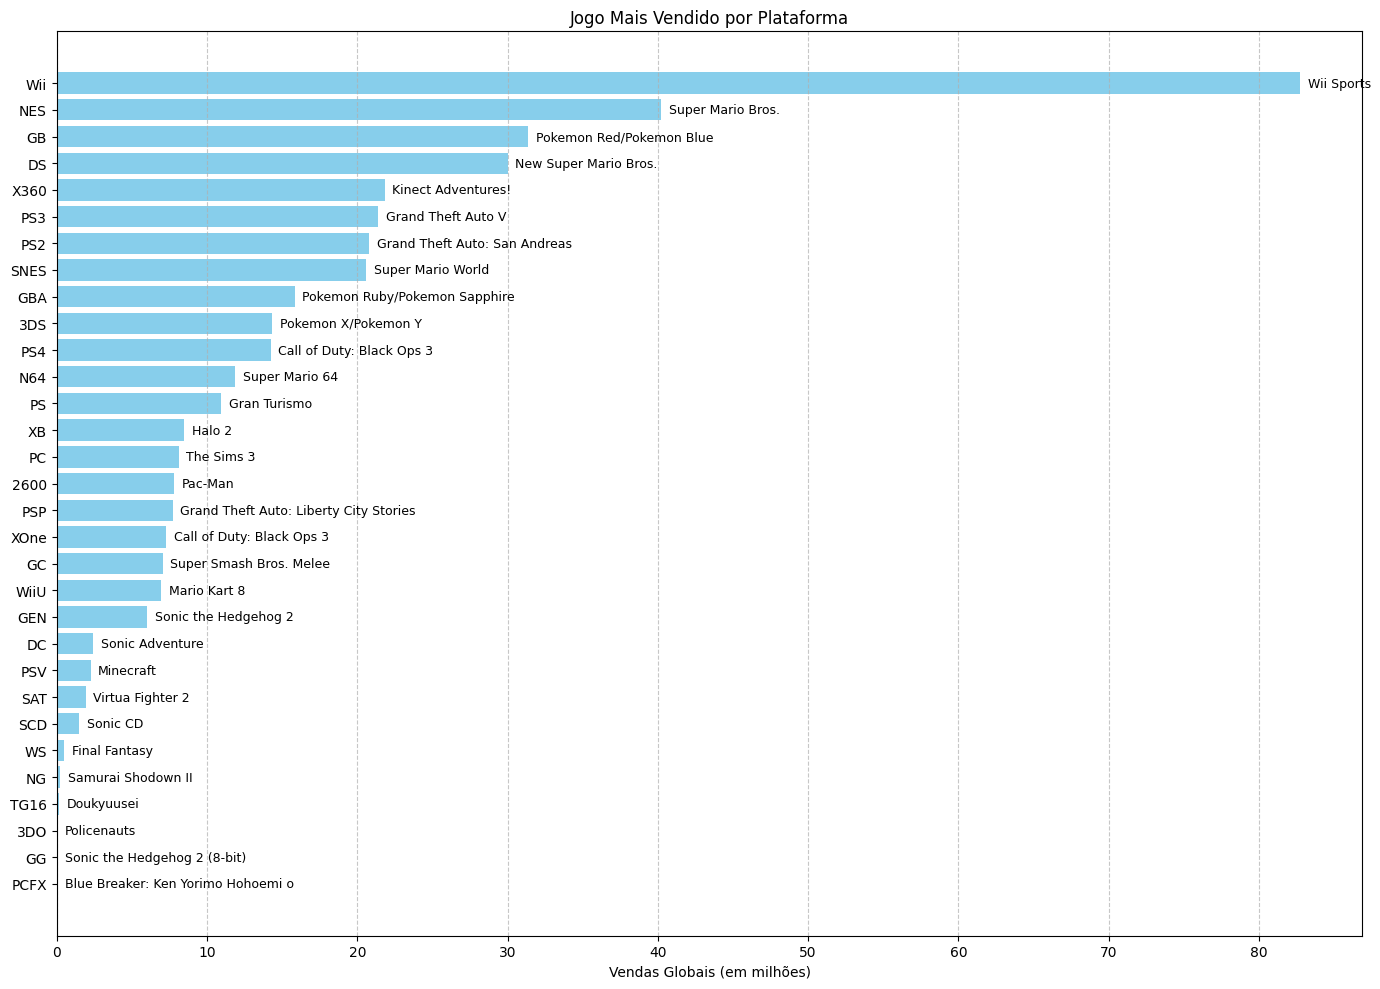

In [7]:
top_games_by_platform = df.loc[df.groupby("Platform")["Global_Sales"].idxmax()]
result = top_games_by_platform[["Platform", "Name", "Global_Sales"]].sort_values(by="Global_Sales", ascending=False)

plt.figure(figsize=(14, 10))
bars = plt.barh(result["Platform"], result["Global_Sales"], color="skyblue")
plt.xlabel("Vendas Globais (em milhões)")
plt.title("Jogo Mais Vendido por Plataforma")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for bar, name in zip(bars, result["Name"]):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
             name, va='center', fontsize=9)

plt.tight_layout()
plt.show()

# Pergunta 2: Qual publisher tem mais sucesso (por região)?

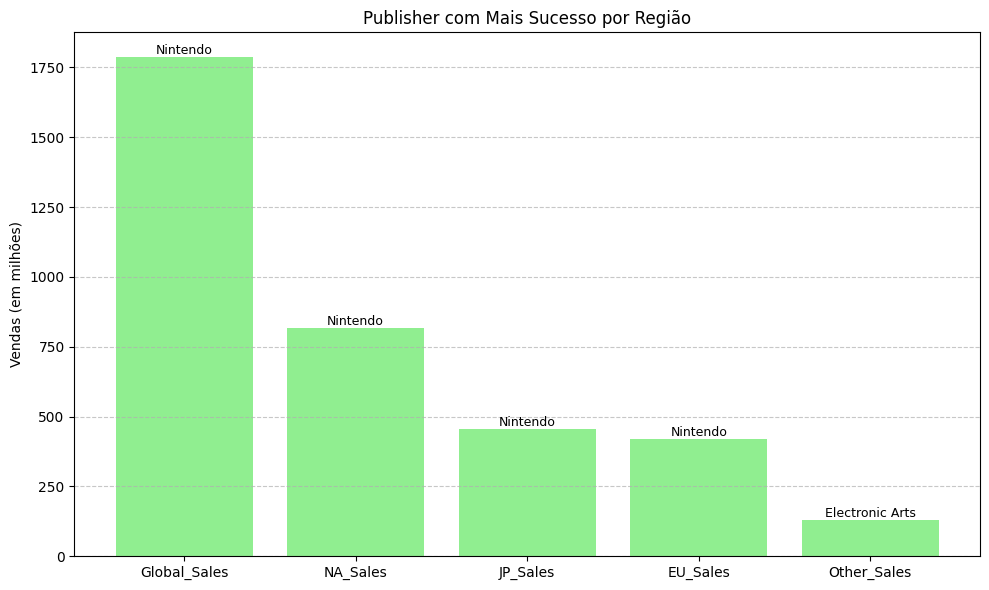

In [11]:
sales_by_publisher = df.groupby("Publisher")[["Global_Sales", "NA_Sales", "JP_Sales", "EU_Sales", "Other_Sales"]].sum()

top_publishers_by_region = {
    region: sales_by_publisher[region].idxmax()
    for region in sales_by_publisher.columns
}

top_sales_by_region = {
    region: sales_by_publisher.loc[publisher, region]
    for region, publisher in top_publishers_by_region.items()
}

regions = list(top_publishers_by_region.keys())
publishers = [top_publishers_by_region[region] for region in regions]
sales = [top_sales_by_region[region] for region in regions]

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, sales, color="lightgreen")
plt.title("Publisher com Mais Sucesso por Região")
plt.ylabel("Vendas (em milhões)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, publisher in zip(bars, publishers):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, publisher,
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Pergunta 3: Qual gênero tem mais sucesso (por região)?

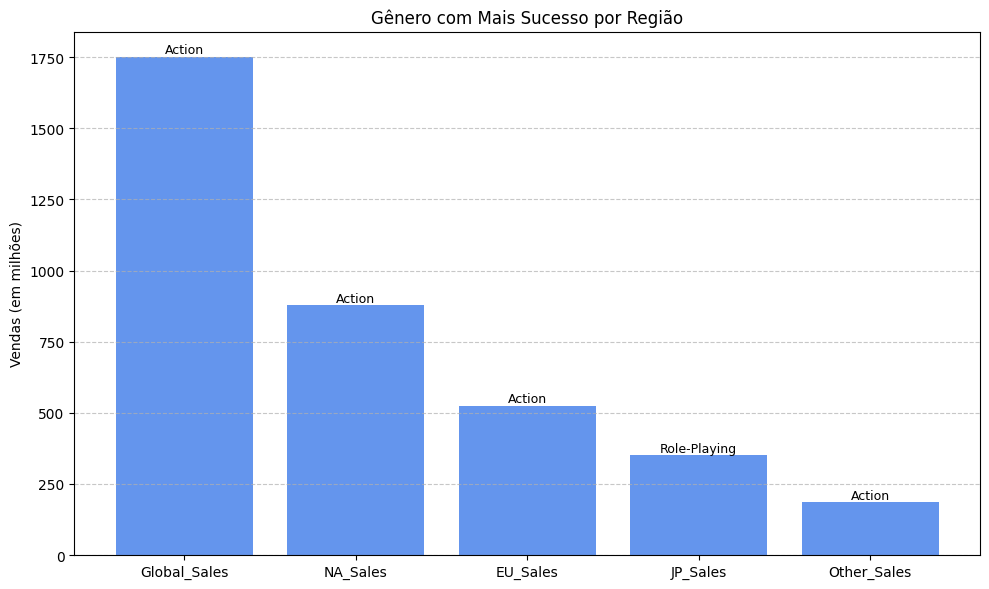

In [14]:
sales_by_genre = df.groupby("Genre")[["Global_Sales", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum()

top_genres_by_region = {
    region: sales_by_genre[region].idxmax()
    for region in sales_by_genre.columns
}

top_sales_by_region = {
    region: sales_by_genre.loc[genre, region]
    for region, genre in top_genres_by_region.items()
}

regions = list(top_genres_by_region.keys())
genres = [top_genres_by_region[region] for region in regions]
sales = [top_sales_by_region[region] for region in regions]

plt.figure(figsize=(10, 6))
bars = plt.bar(regions, sales, color="cornflowerblue")
plt.title("Gênero com Mais Sucesso por Região")
plt.ylabel("Vendas (em milhões)")
plt.grid(axis='y', linestyle='--', alpha=0.7)

for bar, genre in zip(bars, genres):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, genre,
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Pergunta 4: Qual publisher teve mais sucesso (por ano e mostrar jogo mais vendido no ano, para melhor compreensão)?

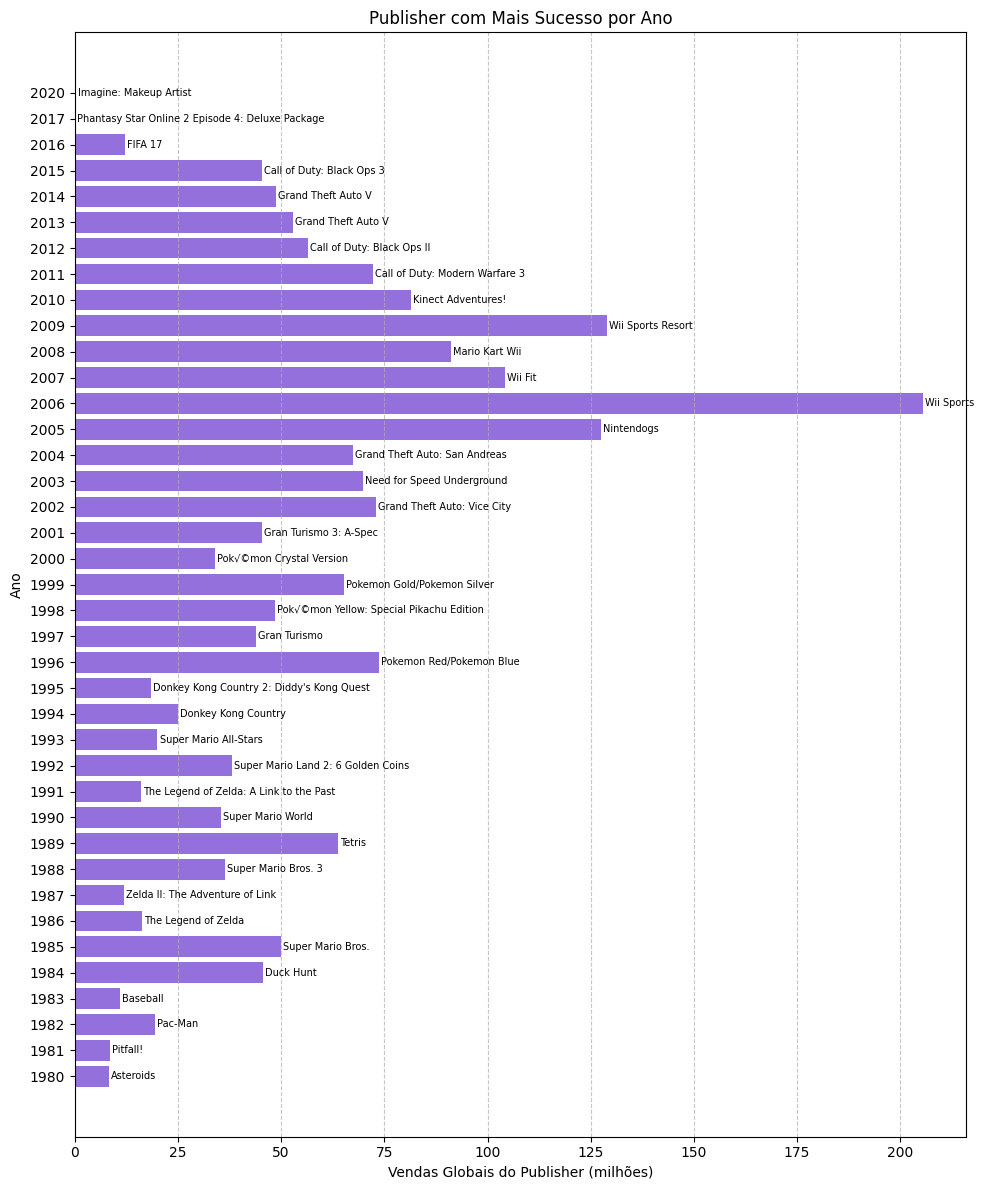

In [22]:
df['Year'] = df['Year'].astype(int)
publisher_sales_per_year = df.groupby(["Year", "Publisher"])["Global_Sales"].sum().reset_index()
top_publishers_by_year = publisher_sales_per_year.loc[publisher_sales_per_year.groupby("Year")["Global_Sales"].idxmax()]
top_games_by_year = df.loc[df.groupby("Year")["Global_Sales"].idxmax()][["Year", "Name", "Global_Sales"]]

merged_result = pd.merge(top_publishers_by_year, top_games_by_year, on="Year", suffixes=("_Publisher", "_TopGame"))

plt.figure(figsize=(10, 12))
bars = plt.barh(merged_result["Year"].astype(str), merged_result["Global_Sales_Publisher"], color="mediumpurple")
plt.xlabel("Vendas Globais do Publisher (milhões)")
plt.ylabel("Ano") 
plt.title("Publisher com Mais Sucesso por Ano")

for bar, game in zip(bars, merged_result["Name"]):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, game,
             ha='left', va='center', fontsize=7)

plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)  
plt.show()

# Pergunta 5: Quais plataformas dominaram o mercado em vendas globais?

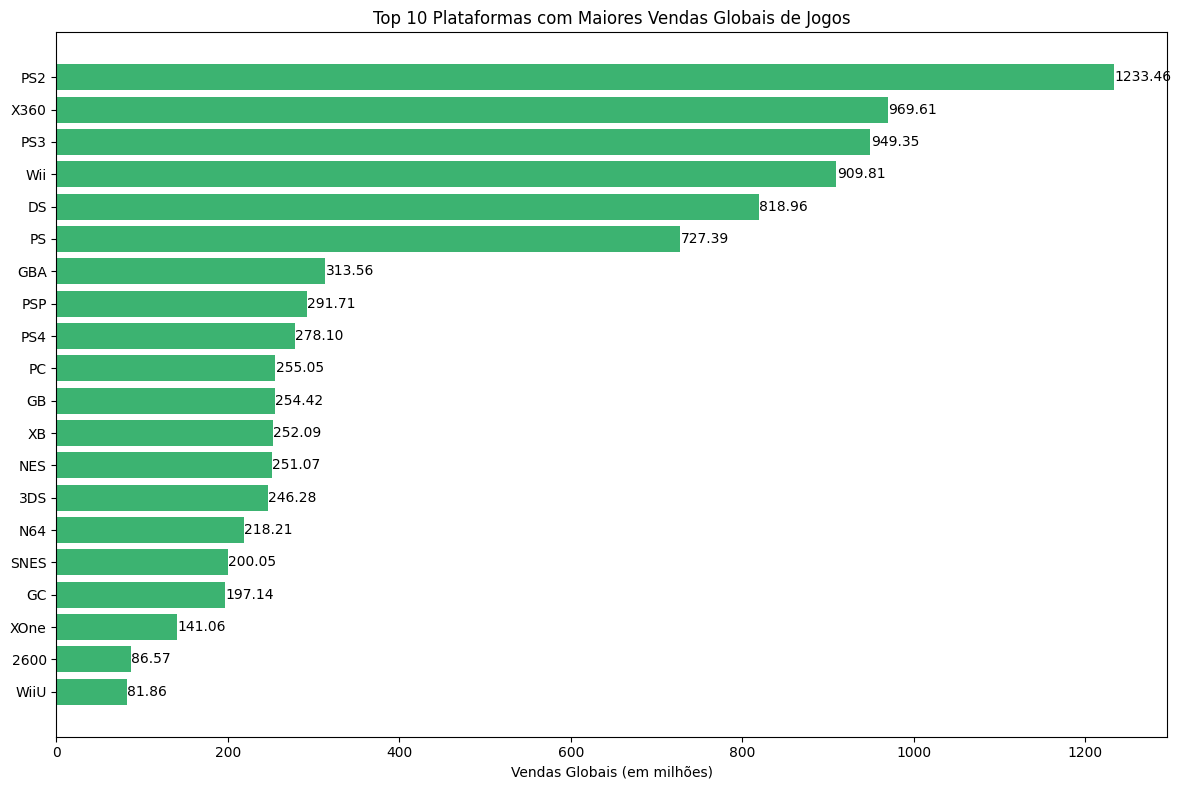

In [52]:
vendas_plataforma = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index()

top_platforms = vendas_plataforma.head(20)

plt.figure(figsize=(12, 8))
bars = plt.barh(top_platforms['Platform'], top_platforms['Global_Sales'], color='mediumseagreen')

# Adiciona os valores de vendas à direita das barras
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2, f'{width:.2f}', va='center')

plt.xlabel('Vendas Globais (em milhões)')
plt.title('Top 10 Plataformas com Maiores Vendas Globais de Jogos')
plt.gca().invert_yaxis()  # Coloca a plataforma mais vendida no topo
plt.tight_layout()
plt.show()

# Pergunta 6: Qual gênero é mais popular em cada plataforma?

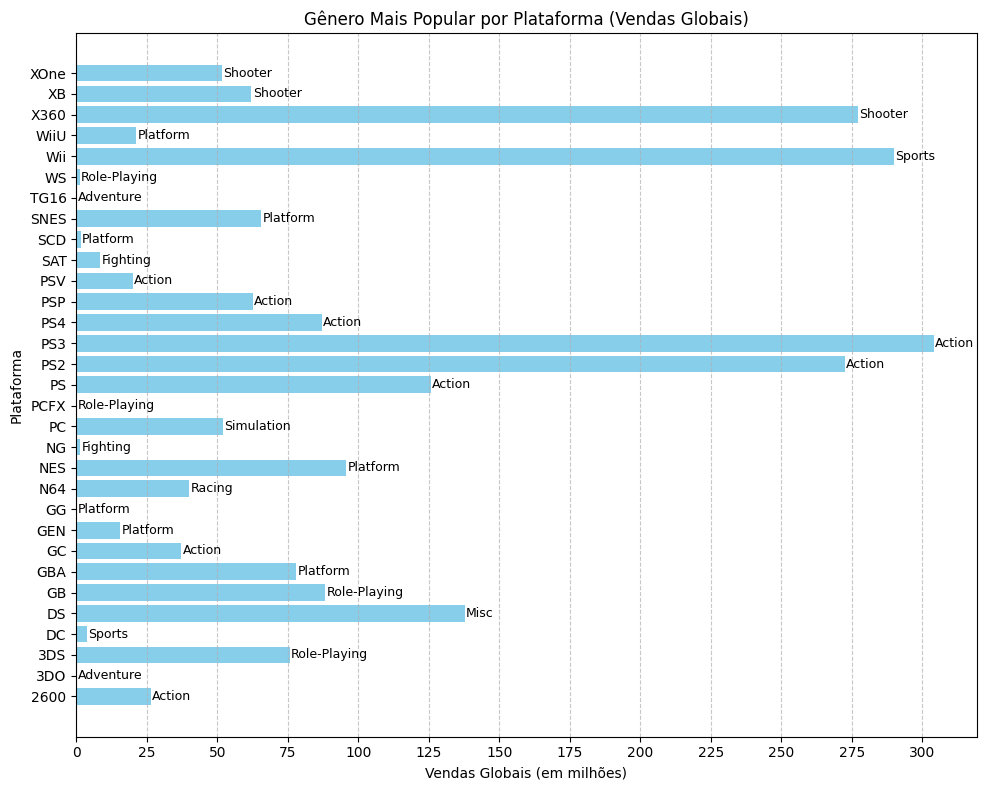

In [45]:
# Agrupa por Plataforma e Gênero, somando as vendas
vendas_por_genero = df.groupby(['Platform', 'Genre'])['Global_Sales'].sum().reset_index()

# Para cada plataforma, pega o gênero com mais vendas
genero_mais_popular = vendas_por_genero.sort_values('Global_Sales', ascending=False).drop_duplicates('Platform')
genero_mais_popular = genero_mais_popular.sort_values('Platform')

# Cria o gráfico de barras
plt.figure(figsize=(10, 8))
bars = plt.barh(
    genero_mais_popular['Platform'],
    genero_mais_popular['Global_Sales'],
    color='skyblue'
)

# Adiciona o gênero à direita da barra
for bar, genero in zip(bars, genero_mais_popular['Genre']):
    width = bar.get_width()
    plt.text(width + 0.5, bar.get_y() + bar.get_height()/2,
             genero, va='center', fontsize=9)

# Ajustes do gráfico
plt.title('Gênero Mais Popular por Plataforma (Vendas Globais)')
plt.xlabel('Vendas Globais (em milhões)')
plt.ylabel('Plataforma')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(np.arange(genero_mais_popular['Global_Sales'].min(), genero_mais_popular['Global_Sales'].max(), 25))
plt.show()

# Pergunta 7: Existe uma correlação entre o ano de lançamento e as vendas globais?

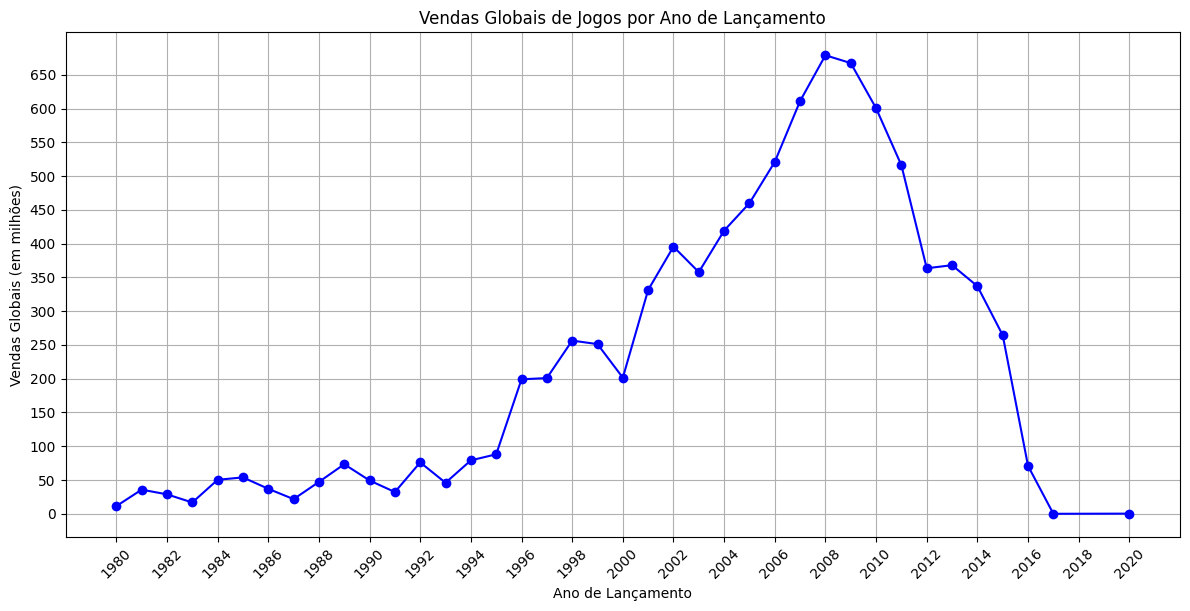

In [30]:
vendas_por_ano = df.groupby('Year')['Global_Sales'].sum().reset_index()

# Plotando
plt.figure(figsize=(12, 6))
plt.plot(vendas_por_ano['Year'], vendas_por_ano['Global_Sales'], marker='o', color='blue')
plt.title('Vendas Globais de Jogos por Ano de Lançamento')
plt.xlabel('Ano de Lançamento')
plt.ylabel('Vendas Globais (em milhões)')
plt.grid(True)
plt.tight_layout()
plt.xticks(ticks=np.arange(vendas_por_ano['Year'].min(), vendas_por_ano['Year'].max()+1, 2), rotation=45)
plt.yticks(ticks=np.arange(vendas_por_ano['Global_Sales'].min(), vendas_por_ano['Global_Sales'].max()+1, 50))
plt.show()

# Pergunta 8: Quais informações mais influenciam as vendas globais?

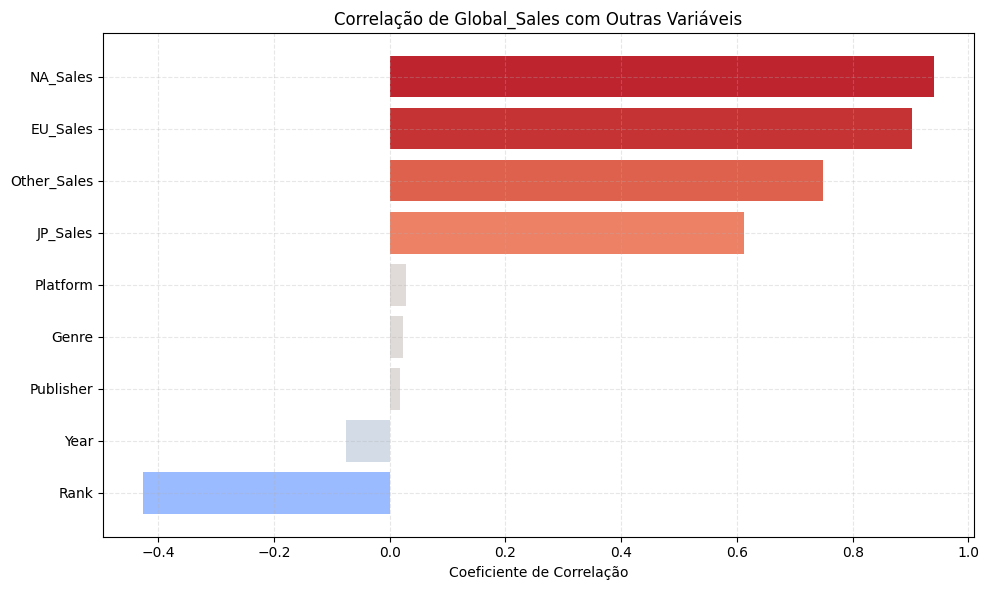

In [25]:
df_encoded = df.copy()

categorical_cols = ['Platform', 'Genre', 'Publisher']

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

numeric_df = df_encoded.select_dtypes(include=['int64', 'float64'])

corr = numeric_df.corr()

global_sales_corr = corr['Global_Sales'].drop('Global_Sales')
global_sales_corr = global_sales_corr.sort_values()

plt.figure(figsize=(10, 6))
plt.barh(global_sales_corr.index, global_sales_corr.values, color=plt.cm.coolwarm((global_sales_corr.values + 1) / 2))
plt.xlabel('Coeficiente de Correlação')
plt.title('Correlação de Global_Sales com Outras Variáveis')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

# Pergunta 9: Qual a participação de mercado por gênero?

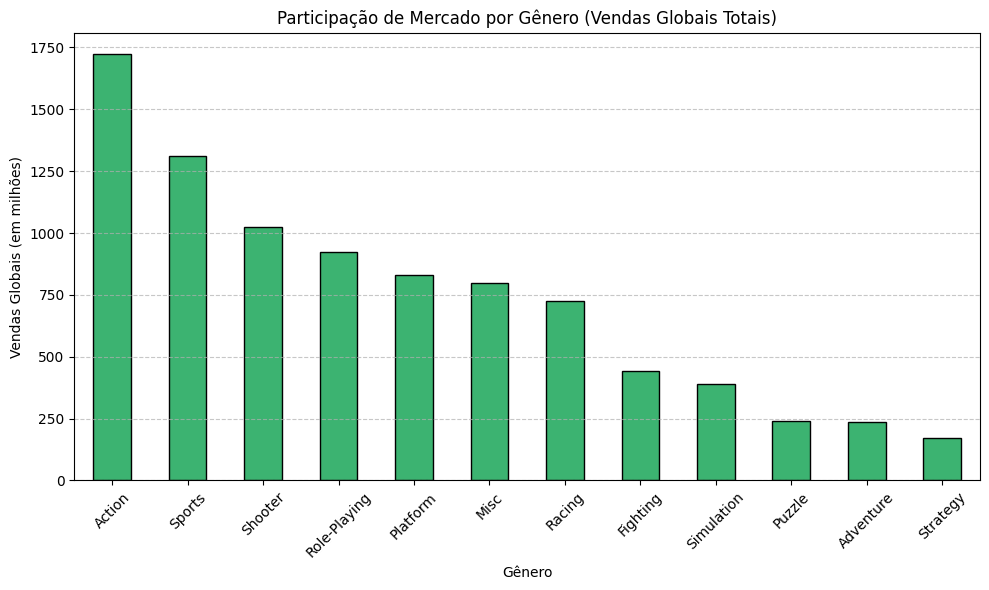

In [24]:
genre_sales = df.groupby("Genre")["Global_Sales"].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
genre_sales.plot(kind="bar", color="mediumseagreen", edgecolor="black")

plt.title("Participação de Mercado por Gênero (Vendas Globais Totais)")
plt.xlabel("Gênero")
plt.ylabel("Vendas Globais (em milhões)")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# Pergunta 10: Qual gênero mais vendeu em cada ano?

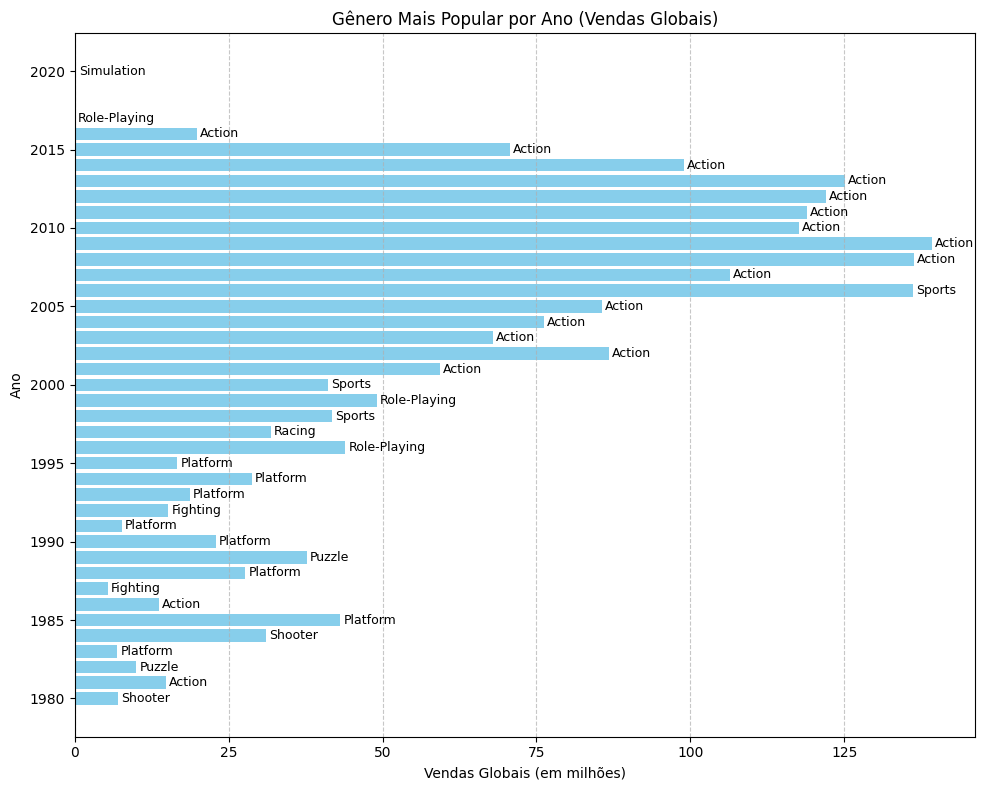

In [27]:
sales_by_year = df.groupby(['Year', 'Genre'])['Global_Sales'].sum().reset_index()

most_pop_genre_by_year = sales_by_year.sort_values('Global_Sales', ascending=False).drop_duplicates('Year')
most_pop_genre_by_year = most_pop_genre_by_year.sort_values('Year')

plt.figure(figsize=(10, 8))
bars = plt.barh(
    most_pop_genre_by_year['Year'],
    most_pop_genre_by_year['Global_Sales'],
    color='skyblue'
)

for bar, genre in zip(bars, most_pop_genre_by_year['Genre']):
    width = bar.get_width()
    plt.text(
        width + 0.5, bar.get_y() + bar.get_height()/2,
        genre, va='center', fontsize=9
    )

# Ajustes do gráfico
plt.title('Gênero Mais Popular por Ano (Vendas Globais)')
plt.xlabel('Vendas Globais (em milhões)')
plt.ylabel('Ano')
plt.tight_layout()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.xticks(np.arange(most_pop_genre_by_year['Global_Sales'].min(), most_pop_genre_by_year['Global_Sales'].max(), 25))
plt.show()